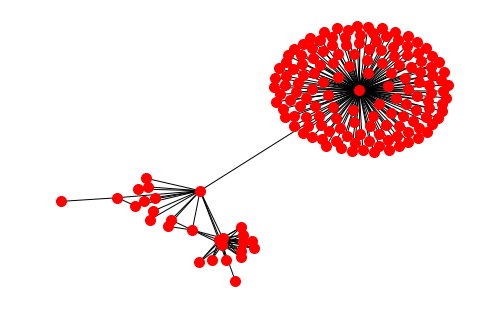

In [33]:
import plotly
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import networkx as nx
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode

plotly.offline.init_notebook_mode(connected=True)

data1 = pd.read_csv('C:\Users\khamz\Downloads\work.csv')
data2 = pd.read_csv('C:\Users\khamz\Downloads\personal.csv')
d_1 = data1[(data1['date'] >= '2018-01-01T00:00:00.000Z') & (data1['date'] <= '2018-01-02T23:59:59.000Z')]
d_2 = data2[(data2['date'] >= '2018-01-01T00:00:00.000Z') & (data2['date'] <= '2018-12-31T23:59:59.000Z')]
G = nx.from_pandas_edgelist(d_1, 'sender', 'receiver')
J = nx.from_pandas_edgelist(d_2, 'sender', 'receiver')
# Sender-Receiver Network of Work E-mail
# Dataset was filtered by date since the computer could not run the whole dataset
nx.draw(G, cmap = plt.get_cmap('jet'), node_size = 100)

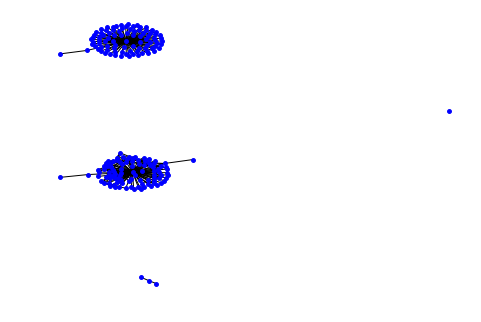

In [32]:
# Sender-Receiver Network of Personal E-mail
# Dataset was filtered by date since the computer could not run the whole dataset
# Now, it is clearly seen that work e-mail data is very much larger than personal e-mail dataset 
nx.draw(J, cmap = plt.get_cmap('jet'), node_size = 15, node_color = "blue")

In [30]:
# Plotting Networks between work-personal and/or sender-receiver e-mails 
trace1 = go.Scatter(x=data1['sender'], y=data1['receiver'], mode='lines', name='Work E-mail Sender-Receiver Network')
trace2 = go.Scatter(x=data1['sender'], y=data2['sender'], mode='lines', name='Work and Personal E-mails Sender-Sender Network' )
trace3 = go.Scatter(x=data1['sender'], y=data2['receiver'], mode='lines', name='Work Sender and Personal Receiver Emails Network')

layout = go.Layout(title="Plot of Enrico Marocco's E-Mail Networks", plot_bgcolor='rgb(250, 250, 250)')

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

plotly.offline.iplot(fig, filename='plot')
# The computer could not run due to lack of RAM

MemoryError: 

In [29]:
# Creating graphs of work and personal e-mail
G_data = nx.Graph()
J_data = nx.Graph()
for row in data1.iterrows():
    G_data.add_edge(row[1]['sender'], row[1]['receiver'])
for row in data2.iterrows():
    J_data.add_edge(row[1]['sender'], row[1]['receiver'])

In [18]:
# Getting degree centrality of work e-mail network 
deg_cen_data1 = nx.degree_centrality(G_data)
sorted(deg_cen_data1.items(), key=lambda x:x[1], reverse=True)[0:10]

[('pariatur.autem.error.tenetur@distinctio.nikolaus.tv', 0.2778204144282425),
 ('rem.esse.quis.alias@sunt.ariel.io', 0.11262471220260936),
 ('vel.ratione.omnis.aspernatur@distinctio.nikolaus.tv', 0.05046047582501918),
 ('aut.corrupti.fuga.sapiente@distinctio.nikolaus.tv', 0.047918265541059095),
 ('autem.aut.eum.non@distinctio.nikolaus.tv', 0.0444646968534152),
 ('ut.perspiciatis.voluptas.quibusdam@distinctio.nikolaus.tv',
  0.04067536454336147),
 ('ad.possimus.dolor.rem@distinctio.nikolaus.tv', 0.04009976976208749),
 ('ducimus.aperiam.est.amet@distinctio.nikolaus.tv', 0.03726976208749041),
 ('delectus.soluta.tempora.magnam@distinctio.nikolaus.tv',
  0.035638910207214124),
 ('et.aut.in.enim@distinctio.nikolaus.tv', 0.035638910207214124)]

In [19]:
# Getting degree centrality of personal e-mail network 
deg_cen_data2 = nx.degree_centrality(J_data)
sorted(deg_cen_data2.items(), key=lambda x:x[1], reverse=True)[0:10]

[('pariatur.autem.error.tenetur@distinctio.nikolaus.tv', 0.33202522775052556),
 ('cum.similique.ipsa.esse@sunt.jarod.biz', 0.3259985984583041),
 ('aut.dolorem.incidunt.eum@iure.kuvalis.info', 0.12908199018920813),
 ('et.quibusdam.sed.vel@nihil.bogisich.info', 0.11086194814295725),
 ('et.aut.reiciendis.dolore@iure.kuvalis.info', 0.050315346881569724),
 ('iste.enim.optio.dolorem@iure.kuvalis.info', 0.05003503854239663),
 ('eius.itaque.velit.quidem@iure.kuvalis.info', 0.05003503854239663),
 ('consectetur.minus.voluptas.est@iure.kuvalis.info', 0.049754730203223546),
 ('provident.voluptatibus.sit.voluptate@iure.kuvalis.info',
  0.03419761737911703),
 ('fuga.perferendis.placeat.quia@iure.kuvalis.info', 0.03167484232655921)]

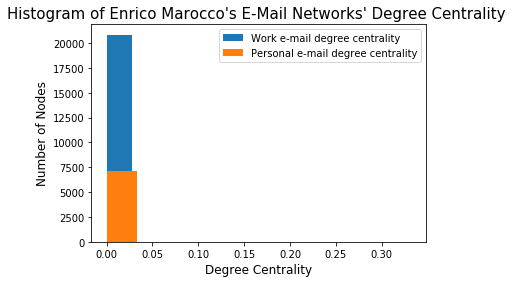

In [28]:
# plotting the histogram of work and personal e-mail networks degree centrality 
plt.hist(list(nx.degree_centrality(G_data).values()))
plt.hist(list(nx.degree_centrality(J_data).values()))
plt.legend(['Work e-mail degree centrality','Personal e-mail degree centrality'])
plt.title("Histogram of Enrico Marocco's E-Mail Networks' Degree Centrality ", size = 15)
plt.ylabel('Number of Nodes', size = 12)
plt.xlabel('Degree Centrality', size = 12)
plt.show()